In [1]:
%%capture
cd ..

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils.unicode_utils import *
from utils.complexity_metrics import *
from utils.make_dfu import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter


In [3]:
dfu = make_dfu()

Deleting 815 rows where script was not found. On inspection, these characters are not linguistic.

Scripts with no available fonts:
SIGNWRITING            672
KHITAN SMALL SCRIPT    471
LINEAR A               341
CYPRO-MINOAN            99
KAWI                    87
SOGDIAN                 82
MASARAM GONDI           75
INDIC SIYAQ             68
NANDINAGARI             64
GUNJALA GONDI           63
OTTOMAN SIYAQ           61
DOGRA                   60
WANCHO                  59
HATRAN                  26
MAKASAR                 25
KATAKANA                24
ELYMAIC                 23
BOPOMOFO                10
HIRAGANA                 7
Name: script, dtype: int64

Scripts for codes with no matching fonts:
CUNEIFORM           1234
CJK                  624
NUSHU                397
MIAO                 140
TAI THAM             127
HANGUL               117
OLD HUNGARIAN        108
SIDDHAM               94
GEORGIAN              91
MEDEFAIDRIN           91
TANGSA                89
ZANABAZAR 

  0%|          | 0/23218 [00:00<?, ?it/s]

character didn't fit: ⸻ character didn't fit: 𑌐 character didn't fit: 𑍌 Checking whether pictures are boxes


  0%|          | 0/23218 [00:00<?, ?it/s]

Found 4286 boxes
Final df has 18932 characters from 102 different scripts.


In [4]:
%%time
"""
this cell runs the 2d convolution method. this is super slow, so probably best
to use the 1d convolution method instead. I thought it would be helpful to see the
difference in the results though.
"""

start = 0
end = 100
subset = dfu.iloc[start:end]

sub_df['picture'] = sub_df.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))


# Compute symmetry for each character in the subset
symmetry_scores = []
for index, row in subset.iterrows():
    character = row['picture']
    lr_symmetry, tb_symmetry = check_symmetry(character)
    symmetry_scores.append((lr_symmetry, tb_symmetry))

# Print the symmetry scores
for index, (lr_symmetry, tb_symmetry) in enumerate(symmetry_scores):
    char_index = start + index
    print(f" {char_index}: left-right symmetry = {lr_symmetry:.3f}, top-bottom symmetry = {tb_symmetry:.3f}")


 0: left-right symmetry = 0.503, top-bottom symmetry = 0.450
 1: left-right symmetry = 0.417, top-bottom symmetry = 0.444
 2: left-right symmetry = 0.478, top-bottom symmetry = 0.532
 3: left-right symmetry = 0.407, top-bottom symmetry = 0.512
 4: left-right symmetry = 0.402, top-bottom symmetry = 0.480
 5: left-right symmetry = 0.437, top-bottom symmetry = 0.495
 6: left-right symmetry = 0.464, top-bottom symmetry = 0.527
 7: left-right symmetry = 0.405, top-bottom symmetry = 0.404
 8: left-right symmetry = 0.351, top-bottom symmetry = 0.351
 9: left-right symmetry = 0.479, top-bottom symmetry = 0.528
 10: left-right symmetry = 0.424, top-bottom symmetry = 0.479
 11: left-right symmetry = 0.474, top-bottom symmetry = 0.548
 12: left-right symmetry = 0.433, top-bottom symmetry = 0.383
 13: left-right symmetry = 0.417, top-bottom symmetry = 0.417
 14: left-right symmetry = 0.437, top-bottom symmetry = 0.438
 15: left-right symmetry = 0.444, top-bottom symmetry = 0.512
 16: left-right sy

In [16]:
"""
this code uses a 1d convulution to compute the symmetry of an image. 
it is much faster than the 2d convolution, but it is not as accurate.
"""

start = 0
end = 100
sub_df = dfu.iloc[start:end]

sub_df['picture'] = sub_df.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))

#compute symmetry for each character in the subset
symmetry_scores = []
for index, row in subset.iterrows():
    character = row['picture']
    lr_symmetry, tb_symmetry = check_symmetry_1d(character)
    symmetry_scores.append((lr_symmetry, tb_symmetry))

#print the symmetry scores
for index, (lr_symmetry, tb_symmetry) in enumerate(symmetry_scores):
    char_index = start + index
    print(f" {char_index}: left-to-right symmetry = {lr_symmetry:.3f}, top-bottom-symmetry = {tb_symmetry:.3f}")

/var/folders/7l/msjd1z0s0614rzlvdntzntyc0000gn/T/ipykernel_54397/1397762452.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['picture'] = sub_df.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))


 0: left-to-right symmetry = 0.450, top-bottom-symmetry = 0.503
 1: left-to-right symmetry = 0.444, top-bottom-symmetry = 0.417
 2: left-to-right symmetry = 0.532, top-bottom-symmetry = 0.478
 3: left-to-right symmetry = 0.512, top-bottom-symmetry = 0.407
 4: left-to-right symmetry = 0.480, top-bottom-symmetry = 0.402
 5: left-to-right symmetry = 0.495, top-bottom-symmetry = 0.437
 6: left-to-right symmetry = 0.527, top-bottom-symmetry = 0.464
 7: left-to-right symmetry = 0.404, top-bottom-symmetry = 0.405
 8: left-to-right symmetry = 0.351, top-bottom-symmetry = 0.351
 9: left-to-right symmetry = 0.528, top-bottom-symmetry = 0.479
 10: left-to-right symmetry = 0.479, top-bottom-symmetry = 0.424
 11: left-to-right symmetry = 0.548, top-bottom-symmetry = 0.474
 12: left-to-right symmetry = 0.383, top-bottom-symmetry = 0.433
 13: left-to-right symmetry = 0.417, top-bottom-symmetry = 0.417
 14: left-to-right symmetry = 0.438, top-bottom-symmetry = 0.437
 15: left-to-right symmetry = 0.512

In [6]:
sub_df['pixel_count_complexity'] = sub_df.picture.apply(pixel_count_complexity)

'   '.join(sub_df.sort_values('pixel_count_complexity', ascending=True).rep.iloc[:100].values)

/var/folders/7l/msjd1z0s0614rzlvdntzntyc0000gn/T/ipykernel_54397/3117181387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['pixel_count_complexity'] = sub_df.picture.apply(pixel_count_complexity)


'ã   a   æ   ä   ß   M   B   N   Ø   z   g   Ñ   Ð   å   s   ð   u   o   â   m   D   ë   e   K   n   E   S   à   á   R   Ë   H   p   I   x   Þ   q   Æ   d   Ï   Z   b   P   c   j   Õ   ê   l   Ê   O   ï   ç   Ö   U   É   È   Q   F   i   é   è   h   Ü   k   Í   Ì   r   G   Ô   W   f   t   Û   X   Î   Ò   Ó   í   ì   Ù   Ú   J   w   C   î   T   L   Ã   Ç   Y   y   A   Ä   v   V   Å   Â   Ý   À   Á'

In [7]:
%%time
#this code checks the symmetry ratios using a 1d convolution for the whole dataframe, and prints them. 

dfu['picture'] = dfu.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))

symmetry_scores = []
for index, row in dfu.iterrows():
    character = row['picture']
    lr_symmetry, tb_symmetry = check_symmetry_1d(character)
    symmetry_scores.append((lr_symmetry, tb_symmetry))

# Assign symmetry scores to the dataframe
dfu['lr_symmetry'] = [score[0] for score in symmetry_scores]
dfu['tb_symmetry'] = [score[1] for score in symmetry_scores]

# Print the symmetry scores for the dataframe
for index, (lr_symmetry, tb_symmetry) in enumerate(symmetry_scores):
    char_index = index + 1
    print(f"{char_index}: left_right symmetry = {lr_symmetry:.3f}, top_bottom symmetry = {tb_symmetry:.3f}")


Character 1: Left-to-Right Symmetry = 0.552, Top-to-Bottom Symmetry = 0.549
Character 2: Left-to-Right Symmetry = 0.549, Top-to-Bottom Symmetry = 0.543
Character 3: Left-to-Right Symmetry = 0.554, Top-to-Bottom Symmetry = 0.552
Character 4: Left-to-Right Symmetry = 0.551, Top-to-Bottom Symmetry = 0.545
Character 5: Left-to-Right Symmetry = 0.552, Top-to-Bottom Symmetry = 0.548
Character 6: Left-to-Right Symmetry = 0.553, Top-to-Bottom Symmetry = 0.549
Character 7: Left-to-Right Symmetry = 0.552, Top-to-Bottom Symmetry = 0.549
Character 8: Left-to-Right Symmetry = 0.552, Top-to-Bottom Symmetry = 0.543
Character 9: Left-to-Right Symmetry = 0.555, Top-to-Bottom Symmetry = 0.551
Character 10: Left-to-Right Symmetry = 0.554, Top-to-Bottom Symmetry = 0.551
Character 11: Left-to-Right Symmetry = 0.551, Top-to-Bottom Symmetry = 0.547
Character 12: Left-to-Right Symmetry = 0.555, Top-to-Bottom Symmetry = 0.551
Character 13: Left-to-Right Symmetry = 0.549, Top-to-Bottom Symmetry = 0.540
Characte

In [8]:

dfu['pixel_count_complexity'] = dfu.picture.apply(pixel_count_complexity)

'   '.join(dfu.sort_values('pixel_count_complexity',ascending=True).rep.iloc[:100].values)


'Ԫ   Ꙭ   ℻   Ǆ   Ꚗ   Ꝏ   Ꚙ   Ǳ   Ꚅ   Ѭ   ‱   ǅ   Ꟃ   Ѹ   Ꜵ   ॵ   Ꜳ   ʥ   औ   ꟿ   ʤ   ԫ   Ǌ   ऑ   ǋ   ऒ   ǆ   ‰   Ԭ   ᵺ   ǲ   Ѽ   Щ   ꭦ   ओ   Ŵ   Ꝡ   Ӎ   Ꙝ   Ꙧ   Ѿ   Ƣ   Ԣ   Ɱ   Ѩ   ﬄ   Ҧ   ꚗ   ॠ   Ḿ   Ẅ   Ẃ   Ю   Ẁ   Ꙕ   Ꚛ   ॴ   ₯   ꭁ   Ṃ   Ṁ   Ẉ   Ẇ   ख़   Ԡ   Ǿ   ʣ   Ꜽ   Ш   ℔   №   ǳ   ⁂   ﬃ   Ǣ   ᾮ   ᾯ   ѹ   Ꙣ   Ԙ   Ꜩ   Ӂ   Ꝙ   Ҋ   Œ   Ɯ   ꙭ   Ǽ   ₪   Μ   М   M   ꟽ   Ԝ   W   आ   Ⱳ   ȹ   ख   ʩ'

In [9]:
"""
validates the accuracy of the stored distance transform values for each character in the dataframe.
"""


#generate subset dataframes in batches of 100
#num_rows = len(dfu)
#batch_size = 100

#for i in range(0, num_rows, batch_size):
    #sub_dfu = dfu[i:i+batch_size].copy()

    # add distance_transform col to sub_dfu dataframe
    #sub_dfu['distance_transform'] = sub_dfu.picture.apply(distance_transform_edt)

    #for index, row in sub_dfu.iterrows():
        #character = row['picture']
        #distance_transform = row['distance_transform']

        #calculate the distance transform separately
        #calculated_distance_transform = distance_transform_edt(character)

        #compare the calculated distance transform with the stored values
        #if np.array_equal(distance_transform, calculated_distance_transform):
            #print(f"Distance transform values match for character {row['code']}")
        #else:
            #print(f"Distance transform values don't match for character {row['code']}")
    
    #print(sub_dfu[['code', 'picture', 'distance_transform']].head(100))

    # Save the output to CSV
    #sub_dfu[['code', 'picture', 'distance_transform']].to_csv(f'distance_transform_output_{i}.csv', index=False)


'\nvalidates the accuracy of the stored distance transform values for each character in the dataframe.\n'

In [10]:
"""
quantifies the complexity of each character based on its distance transform values. 
"""


#calculate complexity scores for the entire dfu dataframe
complexity_scores = []

for index, row in dfu.iterrows():
    character = row['picture']
    inverted_character = 1 - character #invert the character to get the background pixels
    distance_transform = distance_transform_edt(inverted_character)

    #normalize distance transform values between 0 and 1
    normalized_dt = (distance_transform - np.min(distance_transform)) / (np.max(distance_transform) - np.min(distance_transform))

    #calculate complexity score (ie, avg of normalized values)
    complexity_score = np.mean(normalized_dt)
    complexity_scores.append(complexity_score)

# assign complexity scores to the df
dfu['complexity_score'] = complexity_scores

print(dfu[['code', 'picture', 'complexity_score']])


/var/folders/7l/msjd1z0s0614rzlvdntzntyc0000gn/T/ipykernel_54397/4091600297.py:15: RuntimeWarning: invalid value encountered in true_divide
  normalized_dt = (distance_transform - np.min(distance_transform)) / (np.max(distance_transform) - np.min(distance_transform))


        code                                            picture  \
0       0041  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
1       0042  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
2       0043  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
3       0044  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
4       0045  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
...      ...                                                ...   
18927  E0076  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
18928  E0077  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
18929  E0078  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
18930  E0079  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
18931  E007A  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   

       complexity_score  
0              0.009922  
1              0.013672  
2              0.009676  
3              0.013586  
4              0.009210  
...                 ...  
18927        

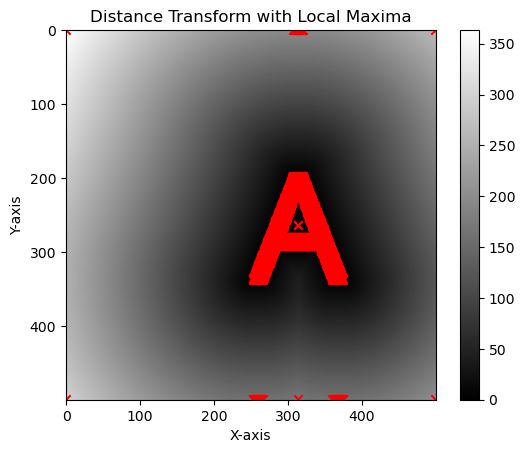

In [11]:

"""
visualizes the distance transform array and overlays the coordinates of local maxima on top of the image.
this helps us understand the shape and structure of the selected character. The dt gives into about the distance
of each pixel from the background pixels. The local maxima are the pixels that are the farthest from the background pixels.

"""

image_index = 0
selected_image = dfu.loc[image_index, 'picture']


#calculate the distance transform of the selected image
distance_transform = distance_transform_edt(selected_image)

#calculate local maxima
#creates a binary mask (footprint) of size 3x3 filled with ones.
footprint = np.ones((3, 3), dtype=bool)
#identifies the local maxima in the distance transform array. It compares each pixel with its surrounding pixels 
# using a maximum filter operation. Pixels that are equal to the maximum value in their neighborhood are considered 
# local maxima.
local_maxima = (distance_transform == maximum_filter(distance_transform, footprint=footprint, mode='constant'))

#retrieves the coordinates of the local maxima in the distance transform array.
local_maxima_coords = np.argwhere(local_maxima)

#display the distance transform array
plt.imshow(distance_transform, cmap='gray')
plt.colorbar()

#plot the local maxima coordinates on top of the image
x_coords = [coord[1] for coord in local_maxima_coords]
y_coords = [coord[0] for coord in local_maxima_coords]
plt.scatter(x_coords, y_coords, color='red', marker='x')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Distance Transform with Local Maxima')

plt.show()


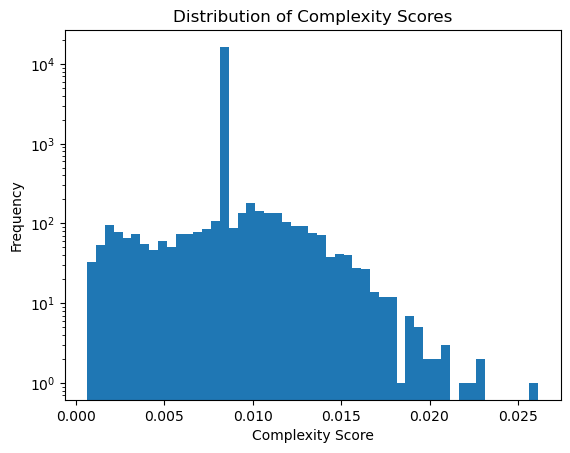

In [12]:
delta = 0.0005
bins = np.arange(np.min(dfu['complexity_score']), np.max(dfu['complexity_score']) + delta, delta)

plt.hist(dfu['complexity_score'], bins=bins)
plt.xlabel('Complexity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Complexity Scores')
plt.yscale('log')

plt.show()
